In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)

### 1. How likely is it that you roll doubles when rolling two dice?

In [2]:
outcomes = [1,2,3,4,5,6]
sims = 100_000
trials = 2

rolls = pd.DataFrame(np.random.choice(outcomes, (sims, trials)))
doubles = rolls[rolls[0] == rolls[1]]
len(doubles)/len(rolls)

0.16497

### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [3]:
#heads is 1, tails is 0
outcomes = [0, 1]
sims = 100_000
trials = 8

flips = pd.DataFrame(np.random.choice(outcomes, (sims, trials)))
heads = flips.sum(axis=1)
# Prob of getting exactly 3 heads
(heads == 3).mean()

0.21941

In [4]:
# Prob of getting more than 3 heads
(heads > 3).mean()

0.63587

### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [5]:
webd = .75
ds = .25
bbs = 2
sims = 100_000

data = np.random.random((sims, bbs))
ds_bbs = (data < ds).sum(axis=1)
(ds_bbs == 2).mean()

0.0628

### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

In [6]:
u = 3
sd = 1.5
stock = 17
days = 5
sims = 100_000

consumed = np.random.normal(3, 1.5, (sims, days))
week_consumed = (consumed.sum(axis=1))
(week_consumed <= 16).mean()

0.61672

### 5. Compare Heights
##### 5.a Men have an average height of 178 cm and standard deviation of 8cm.

In [7]:
u_men = 178
sd_men = 8

##### 5.b Women have a mean of 170, sd = 6cm.

In [8]:
u_women = 170
sd_women = 6

##### 5.c Since you have means and standard deviations, you can use np.random.normal to generate observations.

In [9]:
sims = 100_000
men_obs = np.random.normal(u_men, sd_men, sims)
women_obs = np.random.normal(u_women, sd_women, sims)

##### 5.d If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [10]:
(men_obs < women_obs).mean()

0.20925

### 6.a When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 

In [11]:
sims = 100_000
students = 50
corrupted = 1/250

installs = np.random.random((sims, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()

0.81928

##### 6.b 100 students?

In [12]:
sims = 100_000
students = 100
corrupted = 1/250

installs = np.random.random((sims, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()

0.66675

##### 6.c What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [13]:
sims = 100_000
students = 150
corrupted = 1/250

installs = np.random.random((sims, students))
fails = (installs < corrupted).sum(axis=1)
(fails > 0).mean()

0.45231

##### 6.d How likely is it that 450 students all download anaconda without an issue?

In [14]:
sims = 100_000
students = 450
corrupted = 1/250

installs = np.random.random((sims, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()

0.16453

### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [15]:
sims = 100_000
truck_show = .7
days = 3

data = np.random.random((sims, days))
truck_no_show = (data > truck_show).sum(axis=1)
(truck_no_show == 3).mean()

0.02746

##### 7.b How likely is it that a food truck will show up sometime this week?

In [16]:
sims = 100_000
truck_show = .7
days = 7

data = np.random.random((sims, days))
truck_no_show = (data > truck_show).sum(axis=1)
(truck_no_show <= 6).mean()

0.99982

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [17]:
sims = 100_000
days = range(365)
people = 23

birthdays = pd.DataFrame(np.random.choice(days, (sims, people)))
doubs = birthdays.apply(doubles, axis=1)
(doubs == True).mean()

SpecificationError: nested renamer is not supported

In [ ]:
def doubles(b):
    if len(b) > len(b.unique()):
        return True
    return False

In [ ]:
#20 people
sims = 100_000
days = range(365)
people = 20

birthdays = pd.DataFrame(np.random.choice(days, (sims, people)))
doubs = birthdays.apply(doubles, axis=1)
(doubs == True).mean()

In [ ]:
#40 people
sims = 100_000
days = range(365)
people = 40

birthdays = pd.DataFrame(np.random.choice(days, (sims, people)))
doubs = birthdays.apply(doubles, axis=1)
(doubs == True).mean()

In [ ]:
#another way
sims = 100_000
days = range(365)
people = 40

birthdays = pd.DataFrame(np.random.choice(days, (sims, people)))
doubs = birthdays.nunique(axis=1) < people
(doubs == True).mean()

# BONUS: Mage Dual

##### Let's use what we've learned to play a mage duel!
##### Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.
##### Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means rolling four six-sided dice and summing the result.

#### Exercises
##### Simulate mage duels to answer who is the more powerful mage?
##### Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.

In [18]:
# 6d4

##### Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?

In [19]:
duals = 10
d4_outcomes = [1,2,3,4]
d4_throw = 6

d6_outcomes = [1,2,3,4,5,6]
d6_throw = 4

d4_damage = np.random.choice(d4_outcomes, (duals, d4_throw))
d6_damage = np.random.choice(d6_outcomes, (duals, d6_throw))

d4_wins = d4_damage.sum(axis=1) > d6_damage.sum(axis=1)
(d4_wins).mean()

0.8

##### Do the results change much at 100 duels?

In [20]:
duals = 100
d4_outcomes = [1,2,3,4]
d4_throw = 6

d6_outcomes = [1,2,3,4,5,6]
d6_throw = 4

d4_damage = np.random.choice(d4_outcomes, (duals, d4_throw))
d6_damage = np.random.choice(d6_outcomes, (duals, d6_throw))

d4_wins = d4_damage.sum(axis=1) > d6_damage.sum(axis=1)
(d4_wins).mean()

0.58

##### Now, simulate 10,000 mage duels. Is there a clear winner?

In [21]:
duals = 10_000
d4_outcomes = [1,2,3,4]
d4_throw = 6

d6_outcomes = [1,2,3,4,5,6]
d6_throw = 4

d4_damage = np.random.choice(d4_outcomes, (duals, d4_throw))
d6_damage = np.random.choice(d6_outcomes, (duals, d6_throw))

d4_wins = d4_damage.sum(axis=1) > d6_damage.sum(axis=1)
(d4_wins).mean()

0.5367

In [22]:
#6d4 is the clear winner, winning 55% of duals

# BONUS: Chuck a Luck

#### Rules:

##### The player pays $1 to play and picks a number.

##### The House rolls 3 dice at once.

##### Payouts:

#####  - 3 if all three dice match the chosen number
#####  - 2 if exactly two dice match the chosen number
#####  - 1 is exactly one of the dice matches the chosen number
#####  - If none of the dice match the player's chosen number, then the House keeps the $1.

#### Exercises:

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sims = 1_000_000
throws = 3
outcomes = [1,2,3,4,5,6]
num = np.random.choice(outcomes)

trials = np.random.choice(outcomes, (sims, throws))
win = (trials == num).sum(axis=1)
payout = win - 1

##### What are your chances of getting an outcome payout of 2? (where we earned 3 on the $1 ante)

In [25]:
(payout == 2).mean()

0.00461

##### What are your chances of getting an payout of $1?

In [26]:
(payout == 1).mean()

0.068992

##### What are your chances of getting a payout of 0 where you ante 1 and win 1?

In [27]:
(payout == 0).mean()

0.347765

##### What are your chances of getting a payout of -$1 where you ante up, but don't win anything?

In [28]:
(payout == -1).mean()

0.578633

##### What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

In [29]:
payout.mean()

-0.500421

##### Chart out a histogram of all the outcomes of those 1,000,000 games

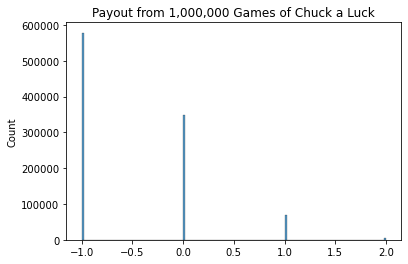

In [30]:
sns.histplot(payout)
plt.title("Payout from 1,000,000 Games of Chuck a Luck")
plt.show()

##### Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

In [31]:
# No

##### If you play 1,000,000 games in a row, what are your winnings/losses?

In [32]:
payout.sum()

-500421